In [1]:
import os
import numpy as np
import yaafelib
from scipy.io import wavfile
from aubio import onset
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt

from read_labels import read_labels

%matplotlib inline

In [2]:
rootdir = '/home/tracek/Data/Birdman/'
filename = os.path.join(rootdir, 'raw/STHELENA-02_20140605_200000_1.wav')
outdir = os.path.join(rootdir, 'raw/samples/')
sheets = read_labels('/home/tracek/Data/Birdman/labels/sthelena_labels.xls')
filename_noext = os.path.splitext(os.path.basename(filename))[0]
sheet = sheets[filename_noext]

# in seconds [s]
signal_start_s = 0
signal_end_s = 95

sr = 16000
win = 512 # samples
hop = win // 2

In [3]:
feature_plan = yaafelib.FeaturePlan(sample_rate=sr)
success = feature_plan.loadFeaturePlan('features.config')
engine = yaafelib.Engine()
engine.load(feature_plan.getDataFlow())
afp = yaafelib.AudioFileProcessor()
afp.processFile(engine, filename)
feats = engine.readAllOutputs()

In [4]:
for name, data in feats.items():
    data = np.flipud((np.log10(data)).T)

In [5]:
feats.keys()

dict_keys(['MagnitudeSpectrum', 'CQT2', 'CQT', 'MelSpectrum'])

In [6]:
feats['CQT'].shape

(35431, 130)

In [7]:
f=feats['CQT'][:5000,:]

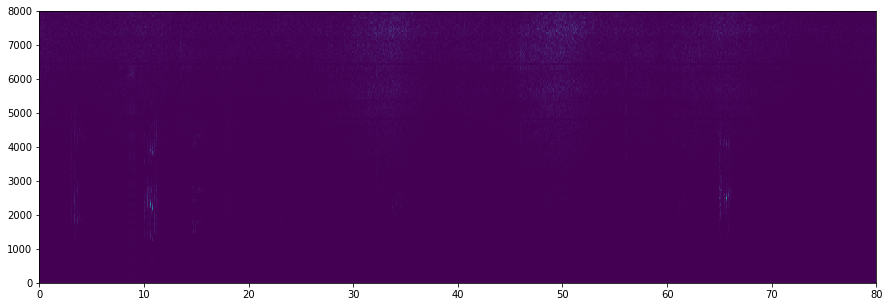

In [23]:
plt.figure(figsize=(15,5))
plt.imshow(f.T, cmap='viridis', interpolation='none', aspect='auto', extent=[0, 5000 * 256 / 16000, 0, sr//2])

In [13]:
5000 * 256 / 16000

80.0

In [10]:
afp.ptr

54527472

In [11]:
sr, signal2 = wavfile.read(filename)

In [12]:
len(signal2) 

9070295